**Quote : 기초자산 가격 입력을 위한 클래스**

```python
ql.SimpleQuote(Real value)

#Functions
ql.SimpleQuote().value()
ql.SimpleQuote().setValue(Real)
```

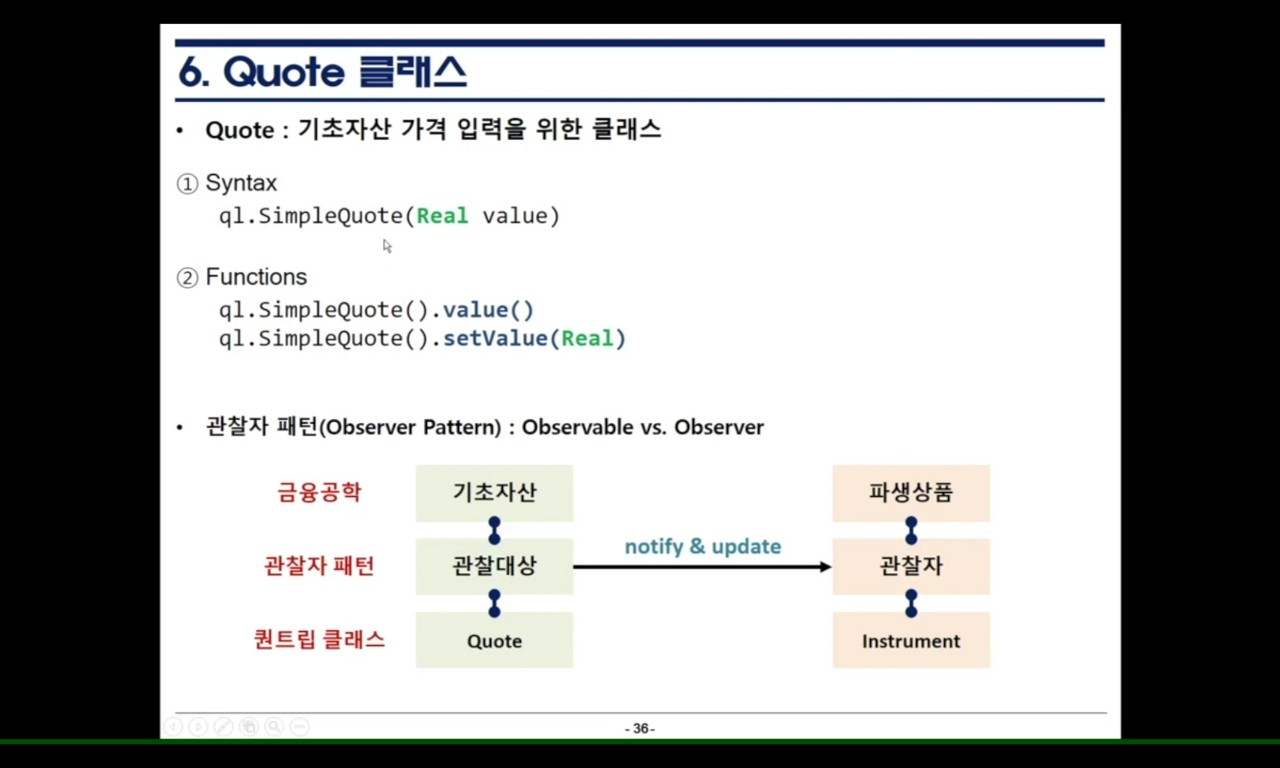

In [1]:
import QuantLib as ql

In [4]:
stock_price = ql.SimpleQuote(10000)
print(stock_price.value())
stock_price.setValue(12000)
print(stock_price.value())

10000.0
12000.0


**InterestRate : 금리, 할인계수, 복리계수**

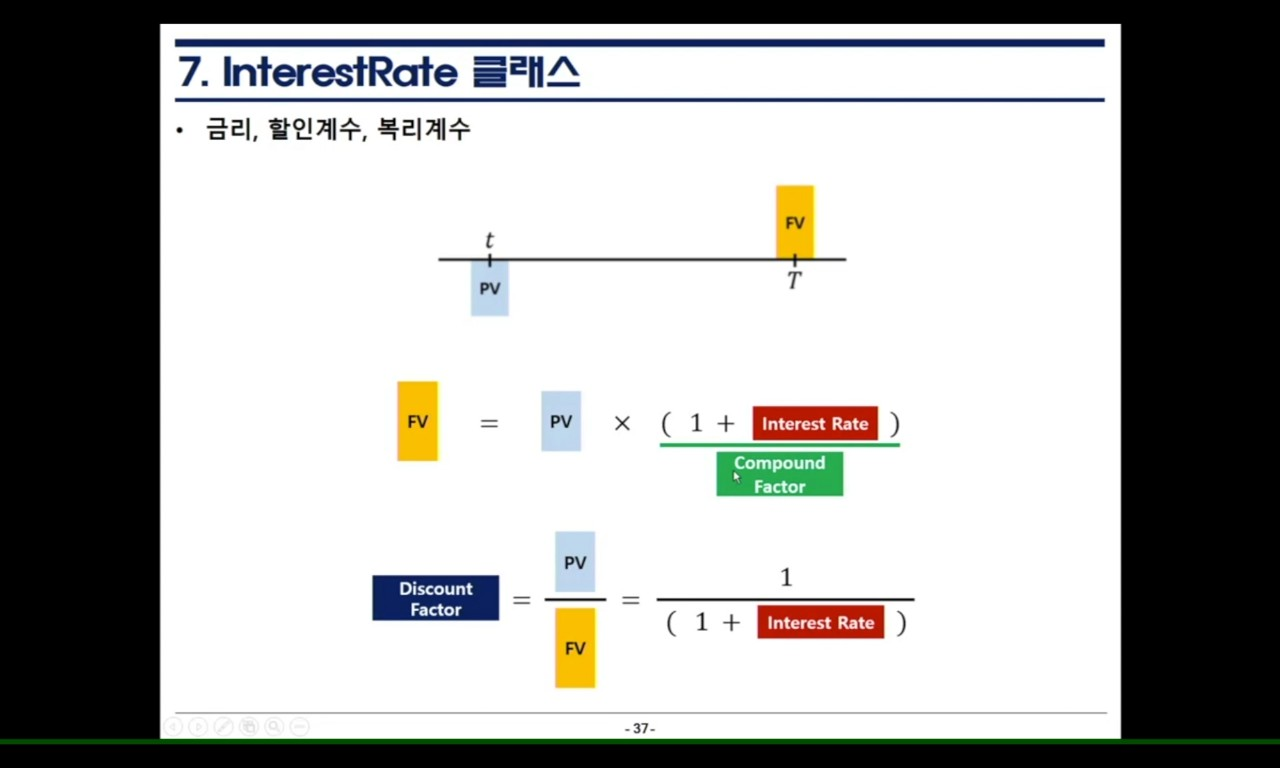

- compound Factor : 복리계수
- **Discount Factor : 할인계수**

```python
ql.InterestRate(Real rate,
                DayCounter dayCounter,
                Compounding comp,
                Frequency freq,)

#Compounding
ql.Simple  #단리
ql.Compounded #복리
ql.Continuous  #복리를 시간을 무수히 잘게 쪼게서 무한대로 보내면 ... 연속복리 (아래의 그림에서 복리 공식 f를 무한대로)
ql.SimpleThenCompounded 
ql.CompoundedThenSimple

#Functions
ql.InterestRate().rate()
ql.InterestRate().compounding()
ql.InterestRate().dayCounter()
ql.InterestRate().frequency()
ql.InterestRate().discountFactor(Time year_unit)
ql.InterestRate().discountFactor(Date start_date, Date end_date)
ql.InterestRate().compoundFactor(Time year_unit)
ql.InterestRate().compoundFactor(Date start_date, Date end_date)

ql.InterestRate().equivalentRate(Compounding compounding,
                                 Frequency freq,
                                 Time t)
# 같은 명목금리라고 할 때, 산출 방식에 따른 실질금리 차이 


ql.InterestRate().equivalentRate(DayCounter dayCounter,
                                 Compounding compounding,
                                 Frequency freq,
                                 Date start_date,
                                 Date end_date)


# 우리가 금리를 모를때.. 대신 복리계수를 아는데... 여기에 숨겨진 명목금리는 얼마인가
ql.InterestRate().impliedRate(Real compoundFactor,
                              DayCounter dayCounter,
                              Compounding compounding,
                              Frequency freq,
                              Date start_date,
                              Date end_date)

```

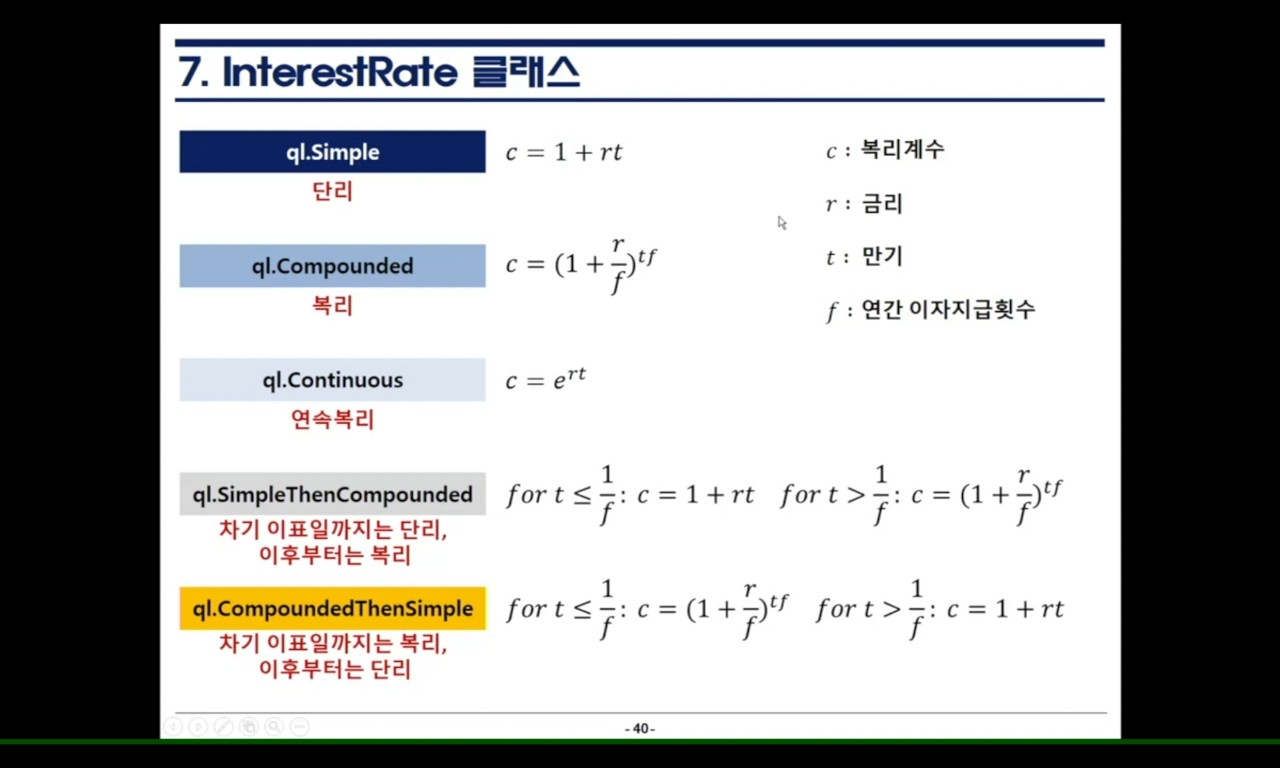

In [7]:
rate = 0.01
dayCounter = ql.ActualActual()
comp = ql.Compounded
freq = ql.Quarterly #분기  
#3개월마다 복리로
#명목금리는 1%

ir = ql.InterestRate(rate, dayCounter, comp, freq)

In [12]:
print(ir.dayCounter())
ir.rate(), ir.frequency(), ir.compounding()

Actual/Actual (ISDA) day counter


(0.01, 4, 1)

In [14]:
start_date = ql.Date(1,1,2020)
end_date = ql.Date(31,12,2020)

ir.discountFactor(start_date, end_date)

0.9900892063524968

In [15]:
ir.compoundFactor(start_date, end_date)

1.0100100006988408

In [18]:
rate = 0.02
dayCounter = ql.Actual360()
comp = ql.Compounded
freq = ql.Annual

ir1 = ql.InterestRate(rate, dayCounter, comp, freq)

In [19]:
# 새로운 방식
dayCounter2 = ql.ActualActual()
comp2 = ql.Continuous
freq2 = ql.Quarterly
start_date = ql.Date(1,1,2020)
end_date = ql.Date(31,12,2020)

print(ir1.equivalentRate(dayCounter2, comp2, freq2, start_date, end_date))

2.013267 % Actual/Actual (ISDA) continuous compounding


In [20]:
# 1년동안의 복리계수가 1.05이고 아래의 방식을 사용할때....
# 여기에 내재되어 있는 실질 금리는 얼마냐?
compoundFactor = 1.05
dayCounter = ql.ActualActual()
comp = ql.Compounded
freq = ql.Annual
date1 = ql.Date(1,1,2020)
date2 = ql.Date(31,12,2020)

#여기는 그냥 불러오는 거에 불과하고...
rate = 0.02
ir = ql.InterestRate(rate, dayCounter, comp, freq)

print(ir.impliedRate(compoundFactor, dayCounter, comp, freq, date1, date2))

5.014036 % Actual/Actual (ISDA) Annual compounding


1. Act/Act로 계산하는 분기 복리 방식의 금리호가가 1%라고 할때, 2020년 8월 3일부터 2021년 12월 9일까지 기간 동안의 할인계수는?

In [5]:
rate = 0.01
dayCounter = ql.ActualActual()
compo = ql.Compounded
freq = ql.Quarterly

ir = ql.InterestRate(rate, dayCounter, compo, freq)
ir.discountFactor(ql.Date(3,8,2020), ql.Date(9,12,2021))

0.9866117262824531

In [37]:
rate= 0.01
dayCounter= ql.ActualActual()
comp = ql.Compounded
freq = ql.Quarterly

ir = ql.InterestRate(rate, dayCounter, comp, freq)
print(ir.discountFactor(ql.Date(3,8,2020), ql.Date(9,12,2021)))

# 할인계수의 역수는 복리계수
print(1 / (ir.discountFactor(ql.Date(3,8,2020), ql.Date(9,12,2021))))

0.9866117262824531
1.0135699519485684


2. Act/Act로 계산하는 분기 복리 방식의 금리호가가 1%라고 할 때, 2020년 8월 3일부터 2021년 12월 9일까지의 복리계수는?

In [26]:
rate = 0.01
dayCounter = ql.ActualActual()
freq = ql.Quarterly
comp = ql.Compounded

ir = ql.InterestRate(rate, dayCounter, comp, freq)
print(ir.compoundFactor(ql.Date(3,8,2020), ql.Date(9,12,2021)))

1.0135699519485684


3. Act/Act로 계산하는 분기 복리 방식의 금리호가가 1%라고 할 때, 이와 실질적으로 동등한 Act/360 반기 연속복리 방식의 금리호가는?

In [39]:
rate = 0.01
dayCounter = ql.ActualActual()
comp = ql.Compounded
freq = ql.Quarterly

ir = ql.InterestRate(rate, dayCounter, comp, freq)

new_dayCounter = ql.Actual360()
new_comp = ql.Continuous
new_freq = ql.Semiannual
start_date = ql.Date(3,8,2020)
end_date = ql.Date(9,12,2021)

print(ir.equivalentRate(new_dayCounter, new_comp, new_freq,start_date, end_date))

# 아래 조건으로 했을 때 위와 동등하게 실질금리를 가지려면
# 0.98% 이자율 지급해야함.

0.984246 % Actual/360 continuous compounding


4. Act/360 분기 복리 방식으로 2020년 8월 3일부터 2020년 10월 10일까지의 복리계수가 1.0295라고 할때 이 복리계수에 내재된 금리는?

In [41]:
compoundFactor = 1.0195
dayCounter = ql.Actual360()
comp = ql.Compounded
freq = ql.Quarterly


#ir은 그냥 위에서 정의한거 그대로 쓰면 됨
print(ir.impliedRate(compoundFactor, dayCounter, comp, freq, ql.Date(3,8,2020), ql.Date(10,10,2020)))


#2달동안 복리계수가 1.0195이고.. 이를 제공한다고 하면 연율화하면 높아짐.


# 복리계수만 알고 내재된 명목금리를 모른다고 할 땐 이 함수쓰면 됨

10.355952 % Actual/360 Quarterly compounding
